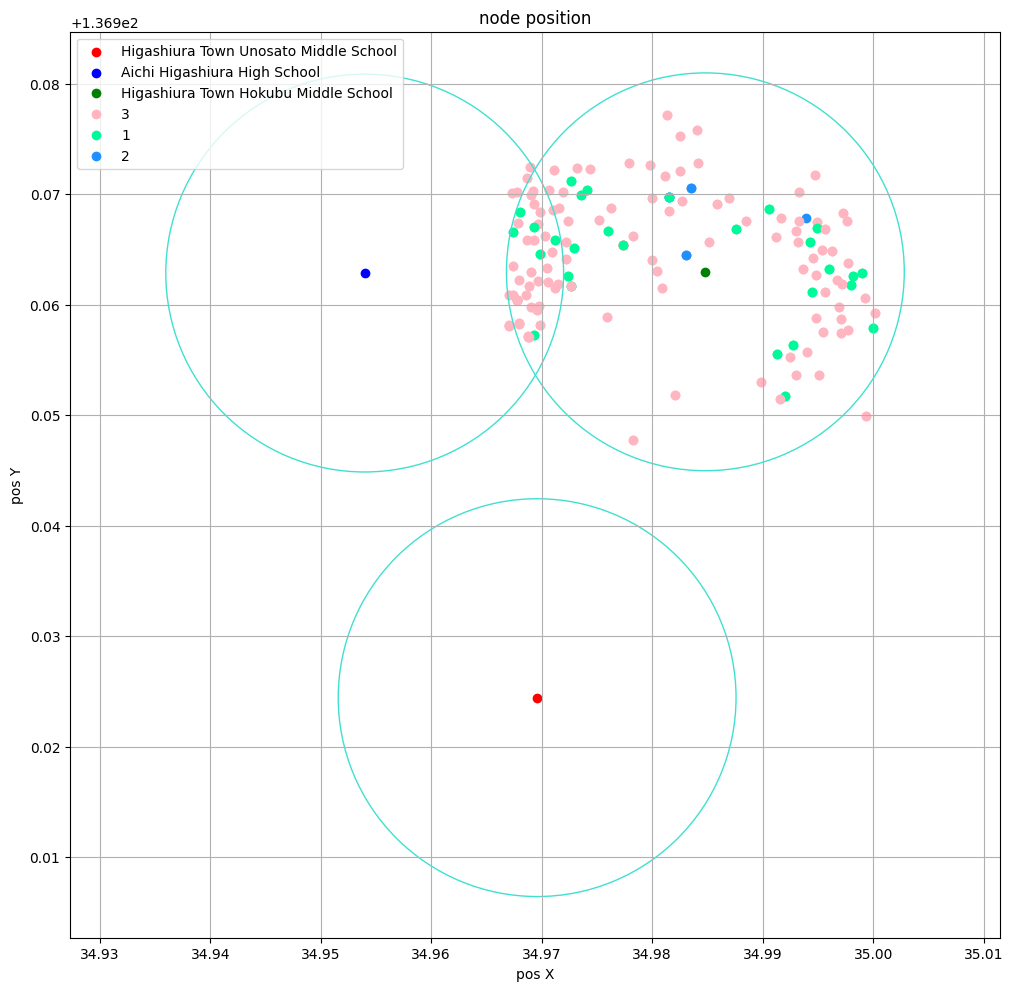

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches

@dataclasses.dataclass
class GarbageBox:
    id: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool


@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float

def HasItBox(value:str):
    if value == "○":
        return True
    else:
        return False

def CountBoxes(box:GarbageBox) -> int:
    cnt:int = 0
    if box.burnable:      cnt = cnt+1
    if box.incombustible: cnt = cnt+1
    if box.resource:      cnt = cnt+1
    return cnt

csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/garbage_box_location.csv"
garbage_boxes = []
garbage_box_csv = pd.read_csv(csv_file)

for index, row in garbage_box_csv.iterrows():
    box = GarbageBox(
        row[0], 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        HasItBox(row[3]),
        HasItBox(row[4]),
        HasItBox(row[5])
    )
    garbage_boxes.append(box)

# ----
fig_p = plt.figure(figsize=(12, 12), dpi=100)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("node position")
ax_p.set_xlabel("pos X")
ax_p.set_ylabel("pos Y")

# --- Gateway ---
gw_a = LoRaWANGateway(34.969587, 136.924443) # 東浦町立卯ノ里小学校
gw_b = LoRaWANGateway(34.953981, 136.962864) # 愛知県立東浦高
gw_c = LoRaWANGateway(34.984811, 136.962978) # 東浦町立北部中学校
# plot point
ax_p.scatter(gw_a.latitude, gw_a.longitude, color='red', label='Higashiura Town Unosato Middle School')
ax_p.scatter(gw_b.latitude, gw_b.longitude, color='blue', label='Aichi Higashiura High School')
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='green', label='Higashiura Town Hokubu Middle School')
# plot coverage
ec_color="turquoise"
gw_c_range = patches.Circle(xy=(gw_a.latitude, gw_a.longitude), radius=0.018, ec=ec_color, fill=False)
ax_p.add_patch(gw_c_range)
gw_c_range = patches.Circle(xy=(gw_b.latitude, gw_b.longitude), radius=0.018, ec=ec_color, fill=False)
ax_p.add_patch(gw_c_range)
gw_c_range = patches.Circle(xy=(gw_c.latitude, gw_c.longitude), radius=0.018, ec=ec_color, fill=False)
ax_p.add_patch(gw_c_range)
ax_p.set_aspect('equal','datalim')
# --- Calc min max ---
min_latitude:float  = garbage_boxes[0].latitude
max_latitude:float  = garbage_boxes[0].latitude
min_longitude:float = garbage_boxes[0].longitude
max_longitude:float = garbage_boxes[0].longitude

for garbage_box in garbage_boxes:
    if min_latitude > garbage_box.latitude: min_latitude = garbage_box.latitude
    if max_latitude < garbage_box.latitude: max_latitude = garbage_box.latitude
    if min_longitude > garbage_box.longitude: min_longitude = garbage_box.longitude
    if max_longitude < garbage_box.longitude: max_longitude = garbage_box.longitude

# ax_p.set_xlim([max_latitude, max_latitude])
# ax_p.set_ylim([max_longitude, max_longitude])
# --- Node ---
color_label_set = [["mediumspringgreen",1],["dodgerblue",2],["lightpink",3]]
plot = ""
is_plot_has_one   = False
is_plot_has_two   = False
is_plot_has_three = False
for i, garbage_box in enumerate(garbage_boxes):
    cnt:int = CountBoxes(garbage_box)
    latitude  = garbage_box.latitude
    longitude = garbage_box.longitude
    color_label = color_label_set[(cnt-1)]
    if (latitude < 34.967) or (longitude < 136.94):
        continue
    elif (cnt == 1) and (not is_plot_has_one):
        ax_p.scatter(latitude, longitude, color=color_label[0], label=color_label[1])
        is_plot_has_one = True
    elif (cnt == 2) and (not is_plot_has_two):
        ax_p.scatter(latitude, longitude, color=color_label[0], label=color_label[1])
        is_plot_has_two = True
    elif (cnt == 3) and (not is_plot_has_three):
        ax_p.scatter(latitude, longitude, color=color_label[0], label=color_label[1])
        is_plot_has_three = True
    else: ax_p.scatter(latitude, longitude, color=color_label[0])

ax_p.legend(loc='upper left')
ax_p.grid(True)
# write file
#file_prefix = datetime.datetime.now().isoformat()
file_name = "garbage_box_location.png"
fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/" + file_name)